In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import calplot
import seaborn as sns

In [4]:
pip install calplot

Note: you may need to restart the kernel to use updated packages.


In [5]:
df=pd.read_csv('police_2017.csv')
df

,Unnamed: 0,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact
0,1952,1953,John McLaughlin,2017-01-01,shot,gun,42.0,M,W,Springfield,OH,False,other,Not fleeing,False,-84.515,39.233,True
1,1953,1954,Trevon Johnson,2017-01-01,shot,knife,17.0,M,B,Villa Park,IL,True,other,Not fleeing,False,-87.978,41.856,True
2,1954,1955,Chad Erik Roberts,2017-01-01,shot,gun,35.0,M,W,Woodstock,GA,False,attack,Car,False,-84.519,34.101,False
3,1955,1956,Juan Carlos Cuadra,2017-01-01,shot,gun,23.0,M,H,Houston,TX,False,attack,Foot,False,-95.428,29.603,True
4,1957,1958,James E. Lewis,2017-01-01,shot and Tasered,gun,44.0,M,B,Springfield,MO,True,attack,Foot,False,-93.275,37.222,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3351,7473,7474,Daniel Raymond Honeycutt,2022-06-10,shot,gun,38.0,M,W,Elizabethton,TN,False,other,Not fleeing,False,-82.155,36.335,True
3352,7492,7493,Derrick D. Clark,2022-06-18,shot,gun,24.0,M,B,Milwaukie,OR,False,other,Car,False,-122.609,45.436,True
3353,7500,7501,Frank Baty,2022-06-19,shot,toy weapon,58.0,M,B,Albuquerque,NM,True,other,Not fleeing,False,-106.649,35.085,True
3354,7691,7692,Samuel Paul Ranson,2022-08-27,shot,gun,50.0,M,W,Charleston,WV,False,attack,Not fleeing,False,-81.586,38.334,True


In [10]:
df1 = df.groupby(['date'])['date'].count()
df1.values

array([5, 2, 4, ..., 1, 1, 1])

In [19]:
Holi=['2017-01-01','2018-01-01','2019-01-01','2020-01-01','2021-01-01','2022-01-01',
      '2017-01-15','2018-01-15','2019-01-15','2020-01-15','2021-01-15','2022-01-15',
      '2017-02-20','2018-02-19','2019-02-18','2020-02-17','2021-02-17','2022-02-21',
      '2017-05-29','2018-05-28','2019-05-27','2020-05-25','2021-05-30','2022-05-30',
      '2017-07-04','2018-07-04','2019-07-04','2020-07-04','2021-07-04','2022-07-04',
      '2017-09-04','2018-09-03','2019-09-02','2020-09-07','2021-09-06','2022-09-05',
      '2017-10-12','2018-10-08','2019-10-14','2020-10-12','2021-10-11','2022-10-11',
      '2017-11-11','2018-11-11','2019-11-11','2020-11-11','2021-11-11','2022-11-11',
      '2017-11-23','2018-11-22','2019-11-28','2020-11-26','2021-11-25','2022-11-24',
      '2017-12-25','2018-12-25','2019-12-25','2020-12-25','2021-12-25','2022-12-25']
is_holiday=[ ]
day1=df1.index
day2=pd.DataFrame(day1)
day=day1.values.tolist()
for i in range(len(day)):
    A=day[i]
    if A in Holi:
        is_holiday.append(True)
    else:
        is_holiday.append(False)
is_holiday=pd.DataFrame(is_holiday)
is_holiday
count_case=df1.values
count_case=pd.DataFrame(count_case)

day2['count_case']=count_case
day2['is_holiday']=is_holiday
day2

,date,count_case,is_holiday
0,2017-01-01,5,True
1,2017-01-03,2,False
2,2017-01-04,4,False
3,2017-01-05,2,False
4,2017-01-06,1,False
...,...,...,...
1486,2022-06-10,1,False
1487,2022-06-18,1,False
1488,2022-06-19,1,False
1489,2022-08-27,1,False


In [12]:
Holi=['2017-01-01','2018-01-01','2019-01-01','2020-01-01','2021-01-01','2022-01-01',
      '2017-01-15','2018-01-15','2019-01-15','2020-01-15','2021-01-15','2022-01-15',
      '2017-02-20','2018-02-19','2019-02-18','2020-02-17','2021-02-17','2022-02-21',
      '2017-05-29','2018-05-28','2019-05-27','2020-05-25','2021-05-30','2022-05-30',
      '2017-07-04','2018-07-04','2019-07-04','2020-07-04','2021-07-04','2022-07-04',
      '2017-09-04','2018-09-03','2019-09-02','2020-09-07','2021-09-06','2022-09-05',
      '2017-10-12','2018-10-08','2019-10-14','2020-10-12','2021-10-11','2022-10-11',
      '2017-11-11','2018-11-11','2019-11-11','2020-11-11','2021-11-11','2022-11-11',
      '2017-11-23','2018-11-22','2019-11-28','2020-11-26','2021-11-25','2022-11-24',
      '2017-12-25','2018-12-25','2019-12-25','2020-12-25','2021-12-25','2022-12-25']
is_holiday=[ ]
day1=df1.index
day2=pd.DataFrame(day1)
day=day1.values.tolist()
for i in range(len(day)):
    A=day[i]
    if A in Holi:
        is_holiday.append(True)
    else:
        is_holiday.append(False)
is_holiday=pd.DataFrame(is_holiday)
is_holiday
count_case=df1.values
count_case=pd.DataFrame(count_case)

day2['count_case']=count_case
day2['is_holiday']=is_holiday
day2

,date,count_case,is_holiday
0,2017-01-01,5,True
1,2017-01-03,2,False
2,2017-01-04,4,False
3,2017-01-05,2,False
4,2017-01-06,1,False
...,...,...,...
1486,2022-06-10,1,False
1487,2022-06-18,1,False
1488,2022-06-19,1,False
1489,2022-08-27,1,False


In [23]:
df1 = df.groupby(['date'])['date'].count()
NM_Holi=['2017-02-02','2018-02-02','2019-02-02','2020-02-02','2021-02-02','2022-02-02',
         '2017-02-14','2018-02-14','2019-02-14','2020-02-14','2021-02-14','2022-02-14'
      '2017-03-17','2018-03-17','2019-03-17','2020-03-17','2021-03-17','2022-03-17',
      '2017-04-01','2018-04-01','2019-04-01','2020-04-01','2021-04-01','2022-04-01',
      '2017-04-18','2018-04-18','2019-04-18','2020-04-18','2021-04-18','2022-04-18',
      '2017-04-20','2018-04-20','2019-04-20','2020-04-20','2021-04-20','2022-04-20',
      '2017-05-11','2018-05-11','2019-05-11','2020-05-11','2021-05-11','2022-05-11',
      '2017-06-14','2018-06-14','2019-06-14','2020-06-14','2021-06-14','2022-06-14',
      '2017-09-11','2018-09-11','2019-09-11','2020-09-11','2021-09-11','2022-09-11',
      '2017-11-01','2018-11-01','2019-11-01','2020-11-01','2021-11-01','2022-11-01']
is_holiday1=[ ]
day1=df1.index
day_2=pd.DataFrame(day1)
day=day1.values.tolist()
for i in range(len(day)):
    A=day[i]
    if A in NM_Holi:
        is_holiday1.append(True)
    else:
        is_holiday1.append(False)
is_holiday1=pd.DataFrame(is_holiday1)
is_holiday1
count_case=df1.values
count_case=pd.DataFrame(count_case)

day_2['count_case']=count_case
day_2['is_holiday1']=is_holiday1
day_2

,date,count_case,is_holiday1
0,2017-01-01,5,False
1,2017-01-03,2,False
2,2017-01-04,4,False
3,2017-01-05,2,False
4,2017-01-06,1,False
...,...,...,...
1486,2022-06-10,1,False
1487,2022-06-18,1,False
1488,2022-06-19,1,False
1489,2022-08-27,1,False


In [24]:
day_2.to_csv('/Users/zhouxilong/Desktop/IE6600/is_NMholiday(new).csv')

In [368]:
# day2.to_csv('/Users/zhouxilong/Desktop/IE6600/is_holiday.csv')

In [369]:
############################ Month #################################

In [370]:
# day2['date']=pd.to_datetime(day2.date)
# day3=day2.set_index('date')
# day3.resample("M").count()

In [371]:
# day3= pd.DataFrame({'date': pd.date_range(start='1-1-2017', end='8-31-2022')})
# day3['date'].groupby(day3.date.dt.to_period("M")).agg('count')

In [372]:
# day2['date']=pd.to_datetime(day2['date'])
# day3=day2.groupby(day2.date.dt.month)['count_case'].sum()
# day3

In [373]:
day2['date']=pd.to_datetime(day2.date)
day2['year']=day2['date'].dt.year
day2['month']=day2['date'].dt.month

month_data=day2.groupby(['year','month'])['count_case'].sum()
month_data=pd.DataFrame(month_data)
month_data


count_case
year month            
2017 1              85
     2              81
     3              59
     4              45
     5              55
...                ...
2022 3              28
     4              14
     5              23
     6               9
     8               2

[67 rows x 1 columns]

In [374]:
month_data.to_csv('/Users/zhouxilong/Desktop/IE6600/month_data.csv')

In [375]:
import pandas as pd
df2=pd.read_csv('month_data.csv')
df2

,year,month,count_case
0,2017,1,85
1,2017,2,81
2,2017,3,59
3,2017,4,45
4,2017,5,55
...,...,...,...
62,2022,3,28
63,2022,4,14
64,2022,5,23
65,2022,6,9


In [376]:
df3=pd.read_csv('is_holiday.csv')
df3=df3.loc[:, ~df3.columns.str.contains('^Unnamed')]
df3

,date,count_case,is_holiday
0,2017-01-01,5,True
1,2017-01-03,2,False
2,2017-01-04,4,False
3,2017-01-05,2,False
4,2017-01-06,1,False
...,...,...,...
1486,2022-06-10,1,False
1487,2022-06-18,1,False
1488,2022-06-19,1,False
1489,2022-08-27,1,False


In [377]:
df4=df.loc[df['state'] == 'CA']
df4=pd.DataFrame(df4)
df4

,Unnamed: 0,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact
8,1961,1962,Ruben Randolph,2017-01-04,shot,gun,51.0,M,B,Pomona,CA,False,attack,Foot,False,-117.737,34.069,True
11,1964,1965,Luis Vargas,2017-01-05,shot,gun,20.0,M,H,Dinuba,CA,False,attack,Not fleeing,False,-119.395,36.555,True
22,1976,1977,Michael Rogers,2017-01-10,shot,knife,32.0,M,W,Los Angeles,CA,False,other,Not fleeing,False,-118.263,34.042,True
25,1979,1980,Hafez Abousamra,2017-01-11,shot,gun,41.0,M,O,Lake Elsinore,CA,False,attack,Other,False,-117.283,33.682,True
32,1987,1988,Eric David Anderson,2017-01-15,shot,gun,48.0,M,W,Azusa,CA,False,attack,Not fleeing,False,-117.909,34.154,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3318,7312,7313,James Walsh,2022-04-14,shot,gun,40.0,M,A,Los Angeles,CA,False,undetermined,Foot,False,-118.253,34.113,True
3319,7325,7326,Jesus Javier Aleman,2022-04-20,shot,gun,33.0,M,H,Bakersfield,CA,False,attack,Other,True,-119.020,35.324,True
3323,7358,7359,Laron James,2022-05-03,shot,gun,54.0,M,B,Los Angeles,CA,True,attack,Not fleeing,False,-118.249,34.047,True
3331,7397,7398,Austin Flores,2022-05-19,shot,toy weapon,27.0,M,H,Fresno,CA,False,other,Not fleeing,True,-119.831,36.781,True


In [378]:
df5= df4.groupby(['date'])['date'].count()
df5=pd.DataFrame(df5)
df5

,date
date,
2017-01-04,1
2017-01-05,1
2017-01-10,1
2017-01-11,1
2017-01-15,2
...,...
2022-03-13,1
2022-04-14,1
2022-04-20,1


In [379]:
df5['state']='CA'

In [380]:
df5.rename(columns={"date": "number_case"},inplace=True)
df5=df5.reset_index()
df5

,date,number_case,state
0,2017-01-04,1,CA
1,2017-01-05,1,CA
2,2017-01-10,1,CA
3,2017-01-11,1,CA
4,2017-01-15,2,CA
...,...,...,...
390,2022-03-13,1,CA
391,2022-04-14,1,CA
392,2022-04-20,1,CA
393,2022-05-03,1,CA


In [382]:
df5.to_csv('/Users/zhouxilong/Desktop/IE6600/month_CA.csv')

In [322]:
df5['date']=pd.to_datetime(df5.date)
total=pd.date_range(start='1/1/2017', end='8/30/2022', freq='D')
total=pd.DataFrame(total)
total.rename(columns={0: "date"},inplace=True)
total
total['date']=pd.to_datetime(total.date)
total1= pd.merge(total, df5, how="left",on = 'date')
total1
#pd.concat([df5,total],axis = 1)
# total.join(df5,rsuffix="_right")

,date,number_case,state
0,2017-01-01,NaN,NaN
1,2017-01-02,NaN,NaN
2,2017-01-03,NaN,NaN
3,2017-01-04,1.0,CA
4,2017-01-05,1.0,CA
...,...,...,...
2063,2022-08-26,NaN,NaN
2064,2022-08-27,NaN,NaN
2065,2022-08-28,NaN,NaN
2066,2022-08-29,NaN,NaN


(<Figure size 900x734.4 with 7 Axes>,
 array([<AxesSubplot:ylabel='2017'>, <AxesSubplot:ylabel='2018'>,
        <AxesSubplot:ylabel='2019'>, <AxesSubplot:ylabel='2020'>,
        <AxesSubplot:ylabel='2021'>, <AxesSubplot:ylabel='2022'>],
       dtype=object))

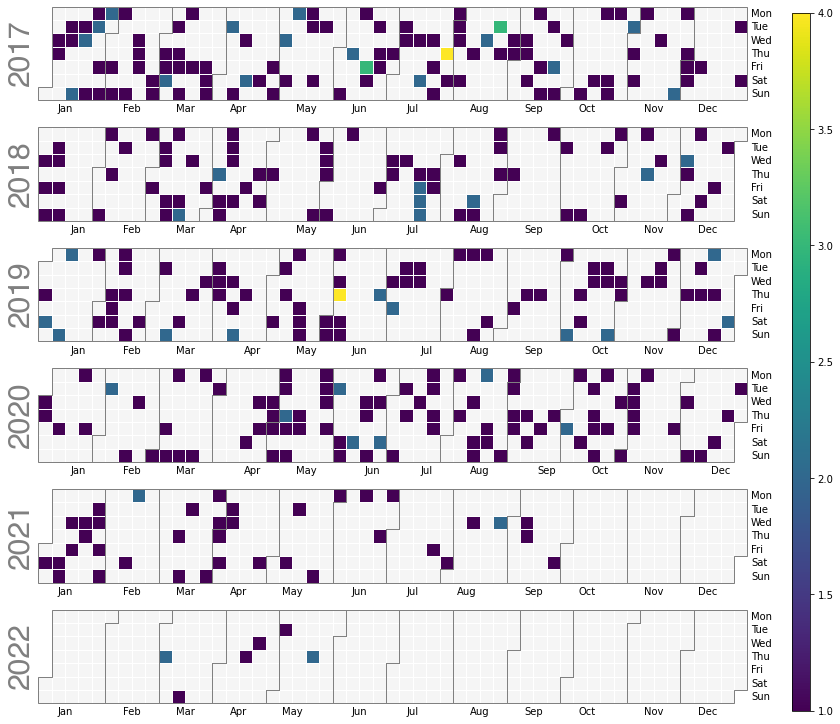

In [394]:
a = total1.loc[:,['date','number_case']]
a = a.fillna(0)
a = a.set_index('date')
a = a['number_case'].squeeze()
#glue = sns.load_dataset("a").pivot("date", "number_case")
#sns.heatmap(a)
calplot.calplot(a)

In [330]:
all_days = pd.date_range('1/1/2019', periods=730, freq='D')
days = np.random.choice(all_days, 500)
events = pd.Series(np.random.randn(len(days)), index=days)
events

2019-04-02    0.827604
2020-09-22   -0.550602
2020-05-11    0.850741
2020-07-22   -0.820728
2020-05-24   -0.801494
                ...   
2019-02-26    0.112005
2019-02-15    0.859077
2019-06-14   -0.190878
2020-05-07   -0.702974
2020-12-01   -1.999895
Length: 500, dtype: float64